In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# total_cases=pd.read_csv('jhu_cases.csv',header=0)

In [3]:
# total_cases['Total_Cases'] = total_cases.groupby(['Country'])['Cases'].transform('sum')

In [4]:
# total_cases_clean=total_cases.drop_duplicates(subset=['Country'])

In [5]:
# total_cases_clean=total_cases_clean.drop(columns=['Cases'])
# total_cases_clean=total_cases_clean.drop(columns=['Province/State'])

In [6]:
# total_cases_clean.to_csv('country_cases.csv')

In [7]:
total_cases_clean=pd.read_csv('../csv/country_cases_new.csv',header=0)

In [8]:
total_cases_clean['Total_Cases'] = total_cases_clean['Total_Cases'].str.replace(',', '')

In [9]:
genomes_sequenced=pd.read_csv('../csv/country_genomes_sequenced_new.csv',header=0)

In [10]:
# genomes_sequenced

In [11]:
population=pd.read_csv('../csv/country_population_new.csv',header=0)

In [12]:
population['Population'] = population['Population'].str.replace(',', '')

In [13]:
continent=pd.read_csv("../csv/country_continent.csv",header=0)

In [14]:
# population

In [15]:
df_merged=pd.merge(total_cases_clean, genomes_sequenced, on="Country")

In [16]:
df_merged1=pd.merge(df_merged, population, on="Country")

In [17]:
df_merged2=pd.merge(df_merged1, continent, on="Country")

In [18]:
df_merged2.dtypes

index_x         int64
Country        object
Total_Cases    object
index_y         int64
sequenced       int64
Population     object
Continent      object
dtype: object

In [19]:
df_merged2["Total_Cases"] = pd.to_numeric(df_merged2["Total_Cases"])
df_merged2["Population"] = pd.to_numeric(df_merged2["Population"])

In [20]:
df_merged2['cases_per_pop']=df_merged2["Total_Cases"]/df_merged2["Population"]
df_merged2['sequenced_per_mn_cases'] = df_merged2['sequenced']/df_merged2['Total_Cases']*1000000

In [21]:
# df_merged2

In [22]:
df_merged2.to_csv('df_merged2.csv')

In [23]:
df_Asia = df_merged2[df_merged2["Continent"] == "Asia"]
df_Oceania = df_merged2[df_merged2["Continent"] == "Oceania"]
df_NA = df_merged2[df_merged2["Continent"] == "North America"]
df_Europe = df_merged2[df_merged2["Continent"] == "Europe"]
df_Africa = df_merged2[df_merged2["Continent"] == "Africa"]
df_SA = df_merged2[df_merged2["Continent"] == "South America"]

In [24]:
# import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = "Helvetica"
# plt.rc('ytick', labelsize=4.5) 
# plt.rc('xtick', labelsize=4.5) 
# plt.rc('axes', titlesize=5.5)
# plt.rc('axes', labelsize=5.5)
# x=1000
# plt.scatter(x,x,s=0.1)

# plt.yscale('log')
# plt.xscale('log')
# plt.gcf().set_size_inches(2.416, 2.458)

# plt.ylabel('Number of genomes sequenced')
# plt.xlabel('Number of COVID-19 cases')

# plt.tight_layout()
# labels=["Asia","Oceania","North America","South America","Europe","Africa"]

# # plt.legend(labels,loc="top right", prop={'size': 4.5},edgecolor="white")

# lgnd=plt.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white")
# for handle in lgnd.legendHandles:
#     handle.set_sizes([20.0])
# plt.ylim(1,10000000)
# plt.xlim(1,20000000)
# # x = np.linspace(*plt.gca().get_ylim())
# # plt.plot(x, x, color="black")
# plt.savefig('Fig1b_scatter.png', dpi=300, bbox_inches = "tight")
# plt.savefig('Fig1b_scatter.pdf', dpi=300, bbox_inches = "tight")
# plt.show()

In [25]:
min(df_merged2["cases_per_pop"])

2.6074797752372853e-05

In [26]:
#make disputed separate

In [27]:
c1=1/min(df_merged2["cases_per_pop"])
c=1
# (df_Asia["cases_per_pop"]*c1)

In [28]:
# df_Asia["cases_per_pop"]

In [29]:
# cases per pop to gdp per capita

In [30]:
# gdp per capita on x
# number of sequences per capita on y
# dot size is constant
# color by continent
# KEEP fonts the same

# Figure 1b: with variable size and border

In [31]:
# import matplotlib.pyplot as plt

# x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
# y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

# plt.scatter(x, y)
# plt.show()

In [32]:
# plt.scatter( df_Asia['Total_Cases'],df_Asia['sequenced'],s=np.sqrt(df_Asia["cases_per_pop"]*c1)*c,color='#CCBB44',lw=0.1,alpha=alpha,edgecolors='black')


In [33]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

# plt.grid(linewidth=0.3,color="#DDDDDD")
alpha=0.7
c1=1/min(df_merged2["cases_per_pop"])
c=1
plt.scatter( df_Asia['Total_Cases'],df_Asia['sequenced'],s=np.sqrt(df_Asia["cases_per_pop"]*c1)*c,color='#CCBB44',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter( df_Oceania['Total_Cases'],df_Oceania['sequenced'],s=np.sqrt(df_Oceania["cases_per_pop"]*c1)*c,color='#4477AA',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter(df_NA['Total_Cases'],df_NA['sequenced'],s=np.sqrt(df_NA["cases_per_pop"]*c1)*c,color='#AA3377',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter(df_SA['Total_Cases'], df_SA['sequenced'],s=np.sqrt(df_SA["cases_per_pop"]*c1)*c,color='#66CCEE',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter( df_Europe['Total_Cases'],df_Europe['sequenced'],s=np.sqrt(df_Europe["cases_per_pop"]*c1)*c,color='#EE6677',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter(df_Africa['Total_Cases'],df_Africa['sequenced'],s=np.sqrt(df_Africa["cases_per_pop"]*c1)*c,color='#BBBBBB',lw=0.1,alpha=alpha,edgecolors='black')
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.Total_Cases[i],df_merged2.sequenced[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

# for i, txt in enumerate(labels):
#     plt.annotate(txt,(df_merged.Count[i], df_merged.Total_Cases[i]), textcoords="offset points",xytext=(0,2),ha='center')
#
plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced')
plt.xlabel('Number of COVID-19 cases')

plt.tight_layout()

plt.show()

<Figure size 241.6x245.8 with 1 Axes>

In [44]:
df_Asia

,index_x,Country,Total_Cases,index_y,sequenced,Population,Continent,cases_per_pop,sequenced_per_mn_cases
2,3,India,11359048,64,5797,1389456823,Asia,0.008175,510.342064
3,4,Russia,4390608,115,2100,145978239,Asia,0.030077,478.293667
8,9,Turkey,2866012,142,2362,84971058,Asia,0.033729,824.141699
14,15,Iran,1746953,66,59,84740884,Asia,0.020615,33.773089
17,18,Indonesia,1419455,65,523,275537974,Asia,0.005152,368.451272
23,25,Israel,818154,69,2887,9197590,Asia,0.088953,3528.675531
26,28,Iraq,758184,67,33,40847407,Asia,0.018561,43.525055
28,30,Philippines,621498,109,184,110595515,Asia,0.005620,296.058877
29,31,Pakistan,605200,104,58,223866538,Asia,0.002703,95.836087
31,33,Bangladesh,557395,12,885,165832413,Asia,0.003361,1587.742983


KeyError: 'cases_per_pop'

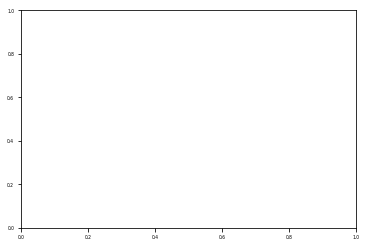

In [43]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)
# plt.grid(linewidth=0.3,color="#DDDDDD")
alpha=0.7
c1=1/min(df_merged2["cases_per_pop"])
c=1
plt.scatter( df_Asia['Total_Cases'],df_Asia['sequenced'],s=np.sqrt(df_Asia["cases_per_pop"]*c1)*c,color='#CCBB44',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter( df_Oceania['Total_Cases'],df_Oceania['sequenced'],s=np.sqrt(df_Oceania["cases_per_pop"]*c1)*c,color='#4477AA',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter(df_NA['Total_Cases'],df_NA['sequenced'],s=np.sqrt(df_NA["cases_per_pop"]*c1)*c,color='#AA3377',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter(df_SA['Total_Cases'], df_SA['sequenced'],s=np.sqrt(df_SA["cases_per_pop"]*c1)*c,color='#66CCEE',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter( df_Europe['Total_Cases'],df_Europe['sequenced'],s=np.sqrt(df_Europe["cases_per_pop"]*c1)*c,color='#EE6677',lw=0.1,alpha=alpha,edgecolors='black')
plt.scatter(df_Africa['Total_Cases'],df_Africa['sequenced'],s=np.sqrt(df_Africa["cases_per_pop"]*c1)*c,color='#BBBBBB',lw=0.1,alpha=alpha,edgecolors='black')
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.Total_Cases[i],df_merged2.sequenced[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

# for i, txt in enumerate(labels):
#     plt.annotate(txt,(df_merged.Count[i], df_merged.Total_Cases[i]), textcoords="offset points",xytext=(0,2),ha='center')
#
plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced')
plt.xlabel('Number of COVID-19 cases')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
    

labels1 = ['0.0002','0.002', '0.02']
lgnd1 = ax.legend(labels1,loc="top right", prop={'size': 4},edgecolor="white",title="Cases per population",fontsize=4)
plt.setp(lgnd1.get_title(),fontsize=4.5)
lgnd1.legendHandles[0]._sizes = [np.sqrt(c1*0.0002)]
lgnd1.legendHandles[1]._sizes = [np.sqrt(c1*0.002)]
lgnd1.legendHandles[2]._sizes = [np.sqrt(c1*0.02)]
# lgnd1.legendHandles[3]._sizes = [np.sqrt(1000)]
# lgnd1.legendHandles[4]._sizes = [np.sqrt(10000)]
lgnd1.legendHandles[0].set_color('#CCBB44')
lgnd1.legendHandles[1].set_color('#CCBB44')
lgnd1.legendHandles[2].set_color('#CCBB44')
# lgnd1.legendHandles[3].set_color('#CCBB44')
ax.add_artist(lgnd)
    


# leg = plt.legend(labels1,loc="lower right", prop={'size': 4.5},edgecolor="white")

plt.ylim(1,20000000)
plt.xlim(1,80000000)
# plt.grid(linewidth=0.3,color="#DDDDDD")
plt.savefig('Fig1b_scatter_nolabel_nogridline.png', dpi=300, bbox_inches = "tight")
plt.savefig('Fig1b_scatter_nolabel_nogridline.pdf', dpi=300, bbox_inches = "tight")
plt.show()

# Figure 1b: without variable size

KeyError: 'cases_per_pop'

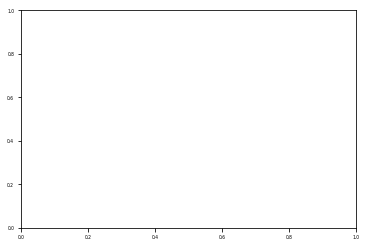

In [45]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)
# plt.grid(linewidth=0.3,color="#DDDDDD")
alpha=0.7
c1=1/min(df_merged2["cases_per_pop"])
c=1
plt.scatter( df_Asia['Total_Cases'],df_Asia['sequenced_per_mn_cases'],color='#CCBB44',lw=0,alpha=alpha)
plt.scatter( df_Oceania['Total_Cases'],df_Oceania['sequenced_per_mn_cases'],color='#4477AA',lw=0,alpha=alpha)
plt.scatter(df_NA['Total_Cases'],df_NA['sequenced_per_mn_cases'],color='#AA3377',lw=0,alpha=alpha)
plt.scatter(df_SA['Total_Cases'], df_SA['sequenced_per_mn_cases'],color='#66CCEE',lw=0,alpha=alpha)
plt.scatter( df_Europe['Total_Cases'],df_Europe['sequenced_per_mn_cases'],color='#EE6677',lw=0,alpha=alpha)
plt.scatter(df_Africa['Total_Cases'],df_Africa['sequenced_per_mn_cases'],color='#BBBBBB',lw=0,alpha=alpha)
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.Total_Cases[i],df_merged2.sequenced_per_mn_cases[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

# for i, txt in enumerate(labels):
#     plt.annotate(txt,(df_merged.Count[i], df_merged.Total_Cases[i]), textcoords="offset points",xytext=(0,2),ha='center')

plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per mn cases')
plt.xlabel('Number of COVID-19 cases')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
lgnd=ax.legend(labels,loc="lower left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
    

labels1 = ['0.0002','0.002', '0.02']
# lgnd1 = ax.legend(labels1,loc="top right", prop={'size': 4},edgecolor="white",title="Cases per population",fontsize=4)
# plt.setp(lgnd1.get_title(),fontsize=4.5)
# # lgnd1.legendHandles[0]._sizes = [np.sqrt(c1*0.0002)]
# # lgnd1.legendHandles[1]._sizes = [np.sqrt(c1*0.002)]
# # lgnd1.legendHandles[2]._sizes = [np.sqrt(c1*0.02)]
# # lgnd1.legendHandles[3]._sizes = [np.sqrt(1000)]
# # lgnd1.legendHandles[4]._sizes = [np.sqrt(10000)]
# lgnd1.legendHandles[0].set_color('#CCBB44')
# lgnd1.legendHandles[1].set_color('#CCBB44')
# lgnd1.legendHandles[2].set_color('#CCBB44')
# lgnd1.legendHandles[3].set_color('#CCBB44')
ax.add_artist(lgnd)
    


# leg = plt.legend(labels1,loc="lower right", prop={'size': 4.5},edgecolor="white")
plt.xticks([1,10,100,1000,10000,100000,1000000,100000000])
# plt.ylim(1,20000000)
# plt.xlim(1,80000000)
# plt.grid(linewidth=0.3,color="#DDDDDD")
plt.savefig('Fig1b_scatter.png', dpi=300, bbox_inches = "tight")
plt.savefig('Fig1b_scatter.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)
# plt.grid(linewidth=0.3,color="#DDDDDD")
alpha=0.7
c1=1/min(df_merged2["cases_per_pop"])
c=1
plt.scatter( df_Asia['Total_Cases'],df_Asia['sequenced_per_mn_cases'],color='#CCBB44',lw=0,alpha=alpha,marker="D", s=5)
plt.scatter( df_Oceania['Total_Cases'],df_Oceania['sequenced_per_mn_cases'],color='#4477AA',lw=0,alpha=alpha,marker="^",s=5)
plt.scatter(df_NA['Total_Cases'],df_NA['sequenced_per_mn_cases'],color='#AA3377',lw=0,alpha=alpha,marker="o",s=5)
plt.scatter(df_SA['Total_Cases'], df_SA['sequenced_per_mn_cases'],color='#66CCEE',lw=0,alpha=alpha,marker= "<",s=5)
plt.scatter( df_Europe['Total_Cases'],df_Europe['sequenced_per_mn_cases'],color='#EE6677',lw=0,alpha=alpha,marker="v",s=5)
plt.scatter(df_Africa['Total_Cases'],df_Africa['sequenced_per_mn_cases'],color='#BBBBBB',lw=0,alpha=alpha,marker= ",",s=5)
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.Total_Cases[i],df_merged2.sequenced_per_mn_cases[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

# for i, txt in enumerate(labels):
#     plt.annotate(txt,(df_merged.Count[i], df_merged.Total_Cases[i]), textcoords="offset points",xytext=(0,2),ha='center')

plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per mn cases')
plt.xlabel('Number of COVID-19 cases')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
lgnd=ax.legend(labels,loc="lower left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
    

labels1 = ['0.0002','0.002', '0.02']
# lgnd1 = ax.legend(labels1,loc="top right", prop={'size': 4},edgecolor="white",title="Cases per population",fontsize=4)
# plt.setp(lgnd1.get_title(),fontsize=4.5)
# # lgnd1.legendHandles[0]._sizes = [np.sqrt(c1*0.0002)]
# # lgnd1.legendHandles[1]._sizes = [np.sqrt(c1*0.002)]
# # lgnd1.legendHandles[2]._sizes = [np.sqrt(c1*0.02)]
# # lgnd1.legendHandles[3]._sizes = [np.sqrt(1000)]
# # lgnd1.legendHandles[4]._sizes = [np.sqrt(10000)]
# lgnd1.legendHandles[0].set_color('#CCBB44')
# lgnd1.legendHandles[1].set_color('#CCBB44')
# lgnd1.legendHandles[2].set_color('#CCBB44')
# lgnd1.legendHandles[3].set_color('#CCBB44')
ax.add_artist(lgnd)
    


# leg = plt.legend(labels1,loc="lower right", prop={'size': 4.5},edgecolor="white")

plt.ylim(1,20000000)
plt.xlim(1,70000000)
# plt.grid(linewidth=0.3,color="#DDDDDD")
plt.savefig('Fig1b_scatter_shape.png', dpi=300, bbox_inches = "tight")
plt.savefig('Fig1b_scatter_shape.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize =(10, 10))
# plt.scatter( df_merged2['Total_Cases'],df_merged2['sequenced'])
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.Total_Cases[i],df_merged2.sequenced[i]), textcoords="offset points",xytext=(0,2),ha='center')
# plt.ylabel('Number of genomes sequenced', fontsize=18)
# plt.xlabel('Number of COVID-19 cases', fontsize=18)
# plt.yscale('log')
# plt.xscale('log')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=16)
# plt.tight_layout()
# plt.ylim(0,20000000)
# plt.xlim(1,20000000)
# plt.savefig('scatter_linear.png', dpi=400, bbox_inches = "tight")
# plt.savefig('scatter_linear.pdf', dpi=400, bbox_inches = "tight")
# plt.show()

In [46]:
GDP=pd.read_csv('../csv/country_GDP.csv',header=0)

In [47]:
GDP

,Country,GDP_per_min,GDP
0,USA,"20,807,269",20807269000000
1,China,"14,860,775",14860775000000
2,Japan,"4,910,580",4910580000000
3,Germany,"3,780,553",3780553000000
4,United Kingdom,"2,638,296",2638296000000
5,India,"2,592,583",2592583000000
6,France,"2,551,451",2551451000000
7,Italy,"1,848,222",1848222000000
8,Canada,"1,600,264",1600264000000
9,South Korea,"1,586,786",1586786000000


In [48]:
# GDP['GDP'] = GDP['GDP'].str.replace(',', '').astype(float)

In [49]:
# GDP

In [50]:
GDP.dtypes

Country        object
GDP_per_min    object
GDP             int64
dtype: object

In [51]:
df_merged=pd.merge(GDP, genomes_sequenced, on="Country")

In [52]:
# df_merged

In [53]:
df_merged1=pd.merge(df_merged, total_cases_clean, on="Country")

In [54]:
df_merged11=pd.merge(df_merged1, continent, on="Country")

In [55]:
# df_merged1

In [56]:
df_merged2=pd.merge(df_merged11, population, on="Country")

In [57]:
df_merged2.dtypes

Country        object
GDP_per_min    object
GDP             int64
index_x         int64
sequenced       int64
index_y         int64
Total_Cases    object
Continent      object
Population     object
dtype: object

In [58]:
df_merged2["Total_Cases"] = pd.to_numeric(df_merged2["Total_Cases"])
df_merged2["Population"] = pd.to_numeric(df_merged2["Population"])


In [59]:
# df_merged2.drop('index_x', axis=1, inplace=True)
# df_merged2.drop('index_y', axis=1, inplace=True)
df_merged2['cases_per_pop'] = df_merged2['Total_Cases']/df_merged2['Population']
df_merged2['sequenced_per_pop'] = df_merged2['sequenced']/df_merged2['Population']
df_merged2['sequenced_per_mn'] = df_merged2['sequenced']/df_merged2['Population']*1000000
# df_merged2['sequenced_per_case'] = df_merged2['sequenced']/df_merged2['Total_Cases']
df_merged2['GDP_per_pop'] = df_merged2['GDP']/df_merged2['Population']
df_merged2['sequenced_per_cases'] = df_merged2['sequenced']/df_merged2['Total_Cases']

In [60]:
df_merged2.to_csv('gdp_per_capita.csv')

In [61]:
Income=pd.read_csv('../csv/country_income_new.csv',header=0)

In [62]:
df_merged2

,Country,GDP_per_min,GDP,index_x,sequenced,index_y,Total_Cases,Continent,Population,cases_per_pop,sequenced_per_pop,sequenced_per_mn,GDP_per_pop,sequenced_per_cases
0,USA,"20,807,269",20807269000000,143,169133,1,30043662,North America,332357370,0.090396,5.088890e-04,508.888971,62605.107869,0.005630
1,China,"14,860,775",14860775000000,30,1040,86,90044,Asia,1439323776,0.000063,7.225615e-07,0.722562,10324.831180,0.011550
2,Japan,"4,910,580",4910580000000,72,21846,39,445585,Asia,126205207,0.003531,1.730990e-04,173.099039,38909.488101,0.049028
3,Germany,"3,780,553",3780553000000,54,24927,10,2569850,Europe,83971144,0.030604,2.968520e-04,296.851976,45022.049479,0.009700
4,United Kingdom,"2,638,296",2638296000000,147,281467,5,4253820,Europe,68134973,0.062432,4.131021e-03,4131.020937,38721.612174,0.066168
5,India,"2,592,583",2592583000000,64,5797,3,11359048,Asia,1389456823,0.008175,4.172134e-06,4.172134,1865.896771,0.000510
6,France,"2,551,451",2551451000000,50,10428,6,4045319,Europe,65374481,0.061879,1.595118e-04,159.511783,39028.241004,0.002578
7,Italy,"1,848,222",1848222000000,70,8383,7,3201838,Europe,60399580,0.053011,1.387924e-04,138.792356,30599.914768,0.002618
8,Canada,"1,600,264",1600264000000,28,19491,22,906201,North America,37972814,0.023864,5.132883e-04,513.288270,42142.360058,0.021508
9,Russia,"1,464,078",1464078000000,115,2100,4,4390608,Asia,145978239,0.030077,1.438571e-05,14.385706,10029.426372,0.000478


In [63]:
df_merged3=pd.merge(df_merged2, Income, on="Country")

In [64]:
df_merged3.to_csv('income_stats.csv')

In [65]:
df_Asia = df_merged2[df_merged2["Continent"] == "Asia"]
df_Oceania = df_merged2[df_merged2["Continent"] == "Oceania"]
df_NA = df_merged2[df_merged2["Continent"] == "North America"]
df_Europe = df_merged2[df_merged2["Continent"] == "Europe"]
df_Africa = df_merged2[df_merged2["Continent"] == "Africa"]
df_SA = df_merged2[df_merged2["Continent"] == "South America"]

In [66]:
df_SA

,Country,GDP_per_min,GDP,index_x,sequenced,index_y,Total_Cases,Continent,Population,cases_per_pop,sequenced_per_pop,sequenced_per_mn,GDP_per_pop,sequenced_per_cases
10,Brazil,"1,363,767",1363767000000,22,4317,2,11439250,South America,213613410,0.053551,2.020941e-05,20.209405,6384.276156,0.000377
29,Argentina,"382,760",382760000000,5,661,12,2192025,South America,45484798,0.048192,1.453233e-05,14.532328,8415.119267,0.000302
41,Colombia,"264,933",264933000000,31,552,11,2299082,South America,51260588,0.044851,1.076851e-05,10.768507,5168.356633,0.000240
43,Chile,"245,414",245414000000,29,1232,23,885379,South America,19230588,0.046040,6.406460e-05,64.064604,12761.648266,0.001391
45,Peru,"195,761",195761000000,108,974,19,1407963,South America,33291219,0.042292,2.925696e-05,29.256964,5880.259296,0.000692
59,Ecuador,"93,078",93078000000,42,205,47,300666,South America,17829222,0.016864,1.149798e-05,11.497978,5220.530655,0.000682
72,Uruguay,"54,135",54135000000,148,135,95,70133,South America,3482141,0.020141,3.876925e-05,38.769251,15546.469830,0.001925
75,Venezuela,"48,610",48610000000,149,3,75,145379,South America,28379499,0.005123,1.057101e-07,0.105710,1712.856171,0.000021
80,Bolivia,"38,938",38938000000,19,27,51,259004,South America,11783753,0.021980,2.291290e-06,2.291290,3304.380192,0.000104
121,Suriname,"2,538",2538000000,134,71,143,9022,South America,590295,0.015284,1.202788e-04,120.278844,4299.545143,0.007870


In [67]:
(min(df_merged2["sequenced_per_pop"]))

3.4207679044125246e-08

In [68]:
min(df_merged2["sequenced_per_pop"])

3.4207679044125246e-08

In [69]:
min(df_merged2["GDP_per_pop"])

456.90582696015565

In [70]:
max(df_merged2["GDP_per_pop"])

108384.63251775924

/home/vc/.local/lib/python3.5/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '
/home/vc/.local/lib/python3.5/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	upper left
	center right
	lower center
	center
	right
	upper right
	lower right
	center left
	best
	lower left
	upper center

  % (loc, '\n\t'.join(self.codes)))


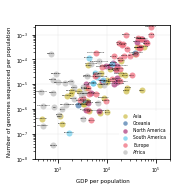

In [71]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7

plt.scatter( df_Asia['GDP_per_pop'],df_Asia['sequenced_per_pop'],color='#CCBB44',lw=0,alpha=alpha)
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['sequenced_per_pop'],color='#4477AA',lw=0,alpha=alpha)
plt.scatter(df_NA['GDP_per_pop'],df_NA['sequenced_per_pop'],color='#AA3377',lw=0,alpha=alpha)
plt.scatter(df_SA['GDP_per_pop'], df_SA['sequenced_per_pop'],color='#66CCEE',lw=0,alpha=alpha)
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['sequenced_per_pop'],color='#EE6677',lw=0,alpha=alpha)
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['sequenced_per_pop'],color='#BBBBBB',lw=0,alpha=alpha)
for i, txt in enumerate(df_merged2.Country):
    plt.annotate(txt,(df_merged2.GDP_per_pop[i],df_merged2.sequenced_per_pop[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

    
plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per population')
plt.xlabel('GDP per population')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
# lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
lgnd=ax.legend(labels,loc="bottom right", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])


plt.ylim(0.00000001,0.0025)
plt.xlim(350,200000)
plt.grid(linewidth=0.3,color="#DDDDDD")
# plt.tight_layout()
plt.savefig('gdp_sequenced.png', dpi=300, bbox_inches = "tight")
plt.savefig('gdp_sequenced.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [72]:
(min(df_merged2["sequenced_per_cases"]))

8.560104775682455e-06

In [73]:
(max(df_merged2["sequenced_per_cases"]))

0.6862648221343873

In [74]:
2.416*300

724.8

# Figure 1e

In [75]:
df_Asia

,Country,GDP_per_min,GDP,index_x,sequenced,index_y,Total_Cases,Continent,Population,cases_per_pop,sequenced_per_pop,sequenced_per_mn,GDP_per_pop,sequenced_per_cases
1,China,"14,860,775",14860775000000,30,1040,86,90044,Asia,1439323776,0.000063,7.225615e-07,0.722562,10324.831180,0.011550
2,Japan,"4,910,580",4910580000000,72,21846,39,445585,Asia,126205207,0.003531,1.730990e-04,173.099039,38909.488101,0.049028
5,India,"2,592,583",2592583000000,64,5797,3,11359048,Asia,1389456823,0.008175,4.172134e-06,4.172134,1865.896771,0.000510
9,Russia,"1,464,078",1464078000000,115,2100,4,4390608,Asia,145978239,0.030077,1.438571e-05,14.385706,10029.426372,0.000478
13,Indonesia,"1,088,768",1088768000000,65,523,18,1419455,Asia,275537974,0.005152,1.898105e-06,1.898105,3951.426310,0.000368
17,Saudi Arabia,"680,897",680897000000,122,953,42,382059,Asia,35190555,0.010857,2.708113e-05,27.081130,19348.856533,0.002494
18,Turkey,"649,436",649436000000,142,2362,9,2866012,Asia,84971058,0.033729,2.779770e-05,27.797700,7643.025935,0.000824
19,Taiwan,"635,547",635547000000,137,173,187,985,Asia,23846915,0.000041,7.254607e-06,7.254607,26651.120281,0.175635
20,Iran,"610,662",610662000000,66,59,15,1746953,Asia,84740884,0.020615,6.962401e-07,0.696240,7206.226454,0.000034
23,Thailand,"509,200",509200000000,138,658,116,26927,Asia,69922401,0.000385,9.410432e-06,9.410432,7282.358625,0.024436


/home/vc/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/home/vc/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


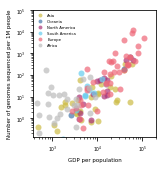

In [76]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7

plt.scatter( df_Asia['GDP_per_pop'],df_Asia['sequenced_per_mn'],color='#CCBB44',lw=0,alpha=alpha)
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['sequenced_per_mn'],color='#4477AA',lw=0,alpha=alpha)
plt.scatter(df_NA['GDP_per_pop'],df_NA['sequenced_per_mn'],color='#AA3377',lw=0,alpha=alpha)
plt.scatter(df_SA['GDP_per_pop'], df_SA['sequenced_per_mn'],color='#66CCEE',lw=0,alpha=alpha)
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['sequenced_per_mn'],color='#EE6677',lw=0,alpha=alpha)
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['sequenced_per_mn'],color='#BBBBBB',lw=0,alpha=alpha)
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.GDP_per_pop[i],df_merged2.sequenced_per_mn[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

    
plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per 1M people')
plt.xlabel('GDP per population')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
# lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
lgnd=ax.legend(labels,loc="bottom right", prop={'size': 3.9},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([15.0])


plt.ylim(0,100000)
plt.xlim(0,200000)
# plt.grid(linewidth=0.3,color="#DDDDDD")
# plt.tight_layout()
plt.savefig('gdp_sequenced_pop.png', dpi=300, bbox_inches = "tight")
plt.savefig('gdp_sequenced_pop.pdf', dpi=300, bbox_inches = "tight")
plt.show()

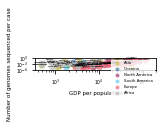

In [77]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7

plt.scatter( df_Asia['GDP_per_pop'],df_Asia['sequenced_per_cases'],color='#CCBB44',lw=0,alpha=alpha)
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['sequenced_per_cases'],color='#4477AA',lw=0,alpha=alpha)
plt.scatter(df_NA['GDP_per_pop'],df_NA['sequenced_per_cases'],color='#AA3377',lw=0,alpha=alpha)
plt.scatter(df_SA['GDP_per_pop'], df_SA['sequenced_per_cases'],color='#66CCEE',lw=0,alpha=alpha)
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['sequenced_per_cases'],color='#EE6677',lw=0,alpha=alpha)
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['sequenced_per_cases'],color='#BBBBBB',lw=0,alpha=alpha)
for i, txt in enumerate(df_merged2.Country):
    plt.annotate(txt,(df_merged2.GDP_per_pop[i],df_merged2.sequenced_per_cases[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

    
plt.yscale('log')
plt.xscale('log')
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per case')
plt.xlabel('GDP per population')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
# lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
lgnd=ax.legend(labels,loc="bottom right", prop={'size': 3.9},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([15.0])


plt.ylim(0.000001,1)
plt.xlim(350,200000)
plt.grid(linewidth=0.3,color="#DDDDDD")
# plt.tight_layout()
plt.savefig('gdp_sequenced_Case.png', dpi=300, bbox_inches = "tight")
plt.savefig('gdp_sequenced_Case.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [97]:
df_high = df_merged3[df_merged3["Income Category"] == "High"]
df_um = df_merged3[df_merged3["Income Category"] == "Upper Middle"]
df_lm = df_merged3[df_merged3["Income Category"] == "Lower Middle"]
df_low = df_merged3[df_merged3["Income Category"] == "Low"]


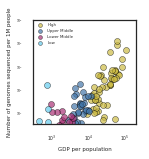

In [99]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=3) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7
l=0.5
plt.scatter( df_high['GDP_per_pop'],df_high['sequenced_per_mn'],color='#CCBB44',lw=l,alpha=alpha,edgecolors='black')
plt.scatter( df_um['GDP_per_pop'],df_um['sequenced_per_mn'],color='#4477AA',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_lm['GDP_per_pop'],df_lm['sequenced_per_mn'],color='#AA3377',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_low['GDP_per_pop'], df_low['sequenced_per_mn'],color='#66CCEE',lw=l,alpha=alpha,edgecolors='black')
    
plt.yscale('log')
plt.xscale('log')
# plt.gcf().set_size_inches(2, 2)
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per 1M people')
plt.xlabel('GDP per population')

plt.tight_layout()



labels=["High","Upper Middle","Lower Middle","Low"]
# lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
lgnd=ax.legend(labels,loc="bottom right", prop={'size': 3.9},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([15.0])


plt.ylim(0,100000)
plt.xlim(0,200000)
# plt.grid(linewidth=0.3,color="#DDDDDD")
# plt.tight_layout()
# plt.savefig('gdp_sequenced_pop.png', dpi=300, bbox_inches = "tight")
# plt.savefig('gdp_sequenced_pop.pdf', dpi=300, bbox_inches = "tight")
plt.show()

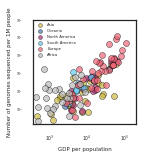

In [94]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=3) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7
l=0.5
plt.scatter( df_Asia['GDP_per_pop'],df_Asia['sequenced_per_mn'],color='#CCBB44',lw=l,alpha=alpha,edgecolors='black')
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['sequenced_per_mn'],color='#4477AA',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_NA['GDP_per_pop'],df_NA['sequenced_per_mn'],color='#AA3377',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_SA['GDP_per_pop'], df_SA['sequenced_per_mn'],color='#66CCEE',lw=l,alpha=alpha,edgecolors='black')
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['sequenced_per_mn'],color='#EE6677',lw=l,alpha=alpha,edgecolors='black')
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['sequenced_per_mn'],color='#BBBBBB',lw=l,alpha=alpha,edgecolors='black')
# for i, txt in enumerate(df_merged2.Country):
#     plt.annotate(txt,(df_merged2.GDP_per_pop[i],df_merged2.sequenced_per_mn[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

    
plt.yscale('log')
plt.xscale('log')
# plt.gcf().set_size_inches(2, 2)
plt.gcf().set_size_inches(2.416, 2.458)

plt.ylabel('Number of genomes sequenced per 1M people')
plt.xlabel('GDP per population')

plt.tight_layout()



labels=["Asia","Oceania","North America","South America","Europe","Africa"]
# lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
lgnd=ax.legend(labels,loc="bottom right", prop={'size': 3.9},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([15.0])


plt.ylim(0,100000)
plt.xlim(0,200000)
# plt.grid(linewidth=0.3,color="#DDDDDD")
# plt.tight_layout()
plt.savefig('gdp_sequenced_pop.png', dpi=300, bbox_inches = "tight")
plt.savefig('gdp_sequenced_pop.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [78]:
max(df_merged2["cases_per_pop"])

0.1324026224204852

In [79]:
min(df_merged2["cases_per_pop"])

2.6074797752372853e-05

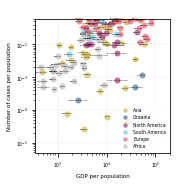

In [80]:
import math
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["font.family"] = "Helvetica"
plt.rc('ytick', labelsize=4.5) 
plt.rc('xtick', labelsize=4.5) 
plt.rc('axes', titlesize=5.5)
plt.rc('axes', labelsize=5.5)

alpha=0.7

plt.scatter( df_Asia['GDP_per_pop'],df_Asia['cases_per_pop'],color='#CCBB44',lw=0,alpha=alpha)
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['cases_per_pop'],color='#4477AA',lw=0,alpha=alpha)
plt.scatter(df_NA['GDP_per_pop'],df_NA['cases_per_pop'],color='#AA3377',lw=0,alpha=alpha)
plt.scatter(df_SA['GDP_per_pop'], df_SA['cases_per_pop'],color='#66CCEE',lw=0,alpha=alpha)
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['cases_per_pop'],color='#EE6677',lw=0,alpha=alpha)
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['cases_per_pop'],color='#BBBBBB',lw=0,alpha=alpha)
for i, txt in enumerate(df_merged2.Country):
    plt.annotate(txt,(df_merged2.GDP_per_pop[i],df_merged2.cases_per_pop[i]), textcoords="offset points",xytext=(0,0.02),ha='center',fontsize=2)

    
plt.yscale('log')
plt.xscale('log')


plt.ylabel('Number of cases per population')
plt.xlabel('GDP per population')





labels=["Asia","Oceania","North America","South America","Europe","Africa"]
# lgnd=ax.legend(labels,loc="upper left", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
lgnd=ax.legend(labels,loc="bottom right", prop={'size': 4.5},edgecolor="white",fontsize=4.5)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.grid(linewidth=0.3,color="#DDDDDD")
plt.ylim(0.000005,0.06)
plt.xlim(350,200000)
plt.gcf().set_size_inches(2.416, 2.458)
# plt.tight_layout()
plt.savefig('gdp_cases.png', dpi=300, bbox_inches = "tight")
plt.savefig('gdp_cases.pdf', dpi=300, bbox_inches = "tight")
plt.show()

In [81]:
import seaborn as sns
sns.set_style("whitegrid")
# sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,8

In [82]:
(pd.unique(df_merged2['Continent']))

array(['North America', 'Asia', 'Europe', 'South America', 'Oceania',
       'Africa'], dtype=object)

In [83]:
len(pd.unique(df_merged2['Continent']))

6

In [84]:
min(df_merged2["cases_per_pop"])

2.6074797752372853e-05

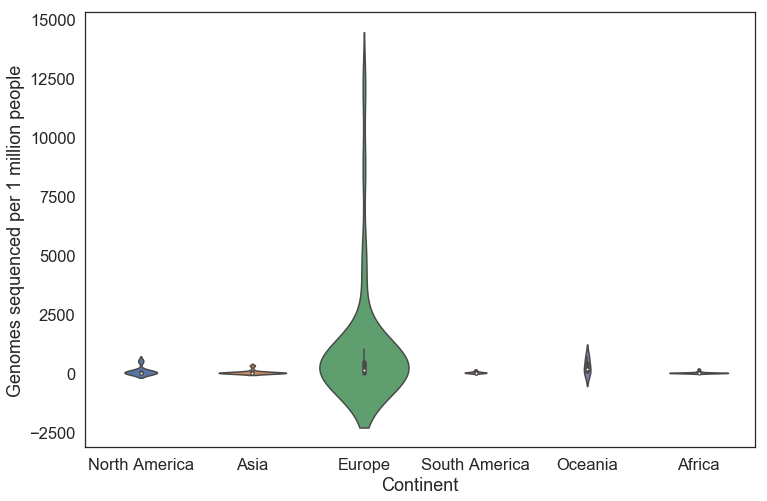

In [85]:
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = sns.violinplot(x="Continent", y="sequenced_per_mn",  data=df_merged2,scale='count')
ax.set(xlabel='Continent', ylabel='Genomes sequenced per 1 million people')
# ax.set_xlabel('Continent',fontsize=20);
# ax.set_ylabel('Cases per population',fontsize=20);
# figure.savefig('full_figure.png')
ax.figure.savefig('violin_continent_seq.png')

In [86]:
df_merged2

,Country,GDP_per_min,GDP,index_x,sequenced,index_y,Total_Cases,Continent,Population,cases_per_pop,sequenced_per_pop,sequenced_per_mn,GDP_per_pop,sequenced_per_cases
0,USA,"20,807,269",20807269000000,143,169133,1,30043662,North America,332357370,0.090396,5.088890e-04,508.888971,62605.107869,0.005630
1,China,"14,860,775",14860775000000,30,1040,86,90044,Asia,1439323776,0.000063,7.225615e-07,0.722562,10324.831180,0.011550
2,Japan,"4,910,580",4910580000000,72,21846,39,445585,Asia,126205207,0.003531,1.730990e-04,173.099039,38909.488101,0.049028
3,Germany,"3,780,553",3780553000000,54,24927,10,2569850,Europe,83971144,0.030604,2.968520e-04,296.851976,45022.049479,0.009700
4,United Kingdom,"2,638,296",2638296000000,147,281467,5,4253820,Europe,68134973,0.062432,4.131021e-03,4131.020937,38721.612174,0.066168
5,India,"2,592,583",2592583000000,64,5797,3,11359048,Asia,1389456823,0.008175,4.172134e-06,4.172134,1865.896771,0.000510
6,France,"2,551,451",2551451000000,50,10428,6,4045319,Europe,65374481,0.061879,1.595118e-04,159.511783,39028.241004,0.002578
7,Italy,"1,848,222",1848222000000,70,8383,7,3201838,Europe,60399580,0.053011,1.387924e-04,138.792356,30599.914768,0.002618
8,Canada,"1,600,264",1600264000000,28,19491,22,906201,North America,37972814,0.023864,5.132883e-04,513.288270,42142.360058,0.021508
9,Russia,"1,464,078",1464078000000,115,2100,4,4390608,Asia,145978239,0.030077,1.438571e-05,14.385706,10029.426372,0.000478


In [87]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(style="whitegrid")
# tips = sns.load_dataset("tips")

# ax = sns.boxplot(x="day", y="total_bill", data=tips, showfliers = False)
# ax = sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

# plt.show()

In [88]:
# import pylab as P
# import numpy as np

# # Define data
# # Define numBoxes

# P.figure()

# bp = P.boxplot(data)

# for i in range(numBoxes):
#     y = data[i]
#     x = np.random.normal(1+i, 0.04, size=len(y))
#     P.plot(x, y, 'r.', alpha=0.2)

# P.show()

In [474]:
medians = df_merged2.groupby(["Continent"])["sequenced_per_mn"].median()

In [475]:
medians

Continent
Africa             4.802266
Asia               5.336713
Europe           141.655973
North America     13.358875
Oceania          184.922333
South America     17.370867
Name: sequenced_per_mn, dtype: float64

In [476]:
df_merged2.median().sort_values().index 

Index(['sequenced_per_pop', 'sequenced_per_cases', 'cases_per_pop',
       'sequenced_per_mn', 'index_y', 'index_x', 'sequenced', 'GDP_per_pop',
       'Total_Cases', 'Population', 'GDP'],
      dtype='object')

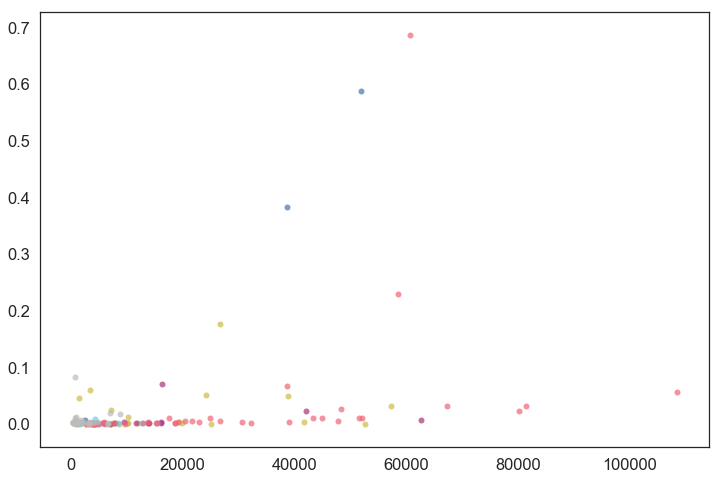

In [477]:

plt.scatter( df_Asia['GDP_per_pop'],df_Asia['sequenced_per_cases'],color='#CCBB44',lw=0,alpha=alpha)
plt.scatter( df_Oceania['GDP_per_pop'],df_Oceania['sequenced_per_cases'],color='#4477AA',lw=0,alpha=alpha)
plt.scatter(df_NA['GDP_per_pop'],df_NA['sequenced_per_cases'],color='#AA3377',lw=0,alpha=alpha)
plt.scatter(df_SA['GDP_per_pop'], df_SA['sequenced_per_cases'],color='#66CCEE',lw=0,alpha=alpha)
plt.scatter( df_Europe['GDP_per_pop'],df_Europe['sequenced_per_cases'],color='#EE6677',lw=0,alpha=alpha)
plt.scatter(df_Africa['GDP_per_pop'],df_Africa['sequenced_per_cases'],color='#BBBBBB',lw=0,alpha=alpha)

In [478]:
df_merged2.to_csv("test.csv")

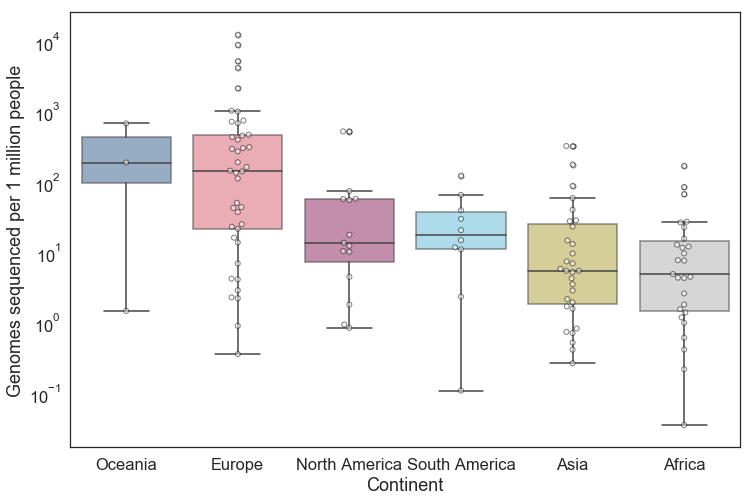

In [479]:

# boxprops=dict(alpha=.3)
rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 1.5)
sns.set_style("white")
tips = sns.load_dataset("tips")
flierprops = dict(marker='o', markerfacecolor='white',
                  linestyle='none', markeredgecolor='black',alpha=0.5,markersize=5)
my_pal = {"Oceania":"#4477AA","Europe": "#EE6677", "Africa": "#BBBBBB", "Asia":"#CCBB44","North America":"#AA3377","South America":"#66CCEE"}
ax = sns.boxplot(x="Continent",y="sequenced_per_mn", palette=my_pal, boxprops=dict(alpha=.6),data=df_merged2,flierprops=flierprops,order=["Oceania","Europe","North America","South America","Asia","Africa"])

ax.set_yscale('log')



ax = sns.swarmplot(x="Continent",y="sequenced_per_mn",  data=df_merged2, color="white",size=5,alpha=0.5, edgecolor="black",linewidth=1,marker='o',order=["Oceania","Europe","North America","South America","Asia","Africa"])

ax.set(xlabel='Continent', ylabel='Genomes sequenced per 1 million people')
# ax.set_xlabel('Continent',fontsize=20);
# ax.set_ylabel('Cases per population',fontsize=20);
# figure.savefig('full_figure.png')
ax.figure.savefig('box_continent_seq.png')

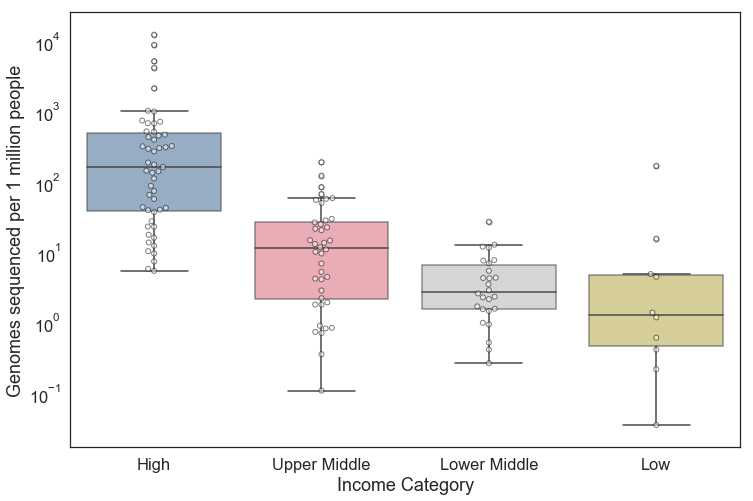

In [488]:
sns.set(font_scale = 1.5)
sns.set_style("white")
flierprops = dict(marker='o', markerfacecolor='white',
                  linestyle='none', markeredgecolor='black',alpha=0.5,markersize=5)
my_pal = {"High":"#4477AA","Upper Middle": "#EE6677", "Lower Middle": "#BBBBBB", "Low":"#CCBB44"}
ax = sns.boxplot(x="Income Category", y="sequenced_per_mn",  data=df_merged3, palette=my_pal,boxprops=dict(alpha=.6),flierprops=flierprops)
# ax = sns.violinplot(x="Income Category", y="sequenced_per_pop",  data=df_merged3,scale='count')
ax.set(xlabel='Income Range', ylabel='Genomes sequenced per population')
ax.set_yscale('log')

ax = sns.swarmplot(x="Income Category", y="sequenced_per_mn", data=df_merged3, color="white",size=5,alpha=0.5, edgecolor="black",linewidth=1,marker='o')
ax.set(xlabel='Income Category', ylabel='Genomes sequenced per 1 million people')
# figure.savefig('full_figure.png')
ax.figure.savefig('box_income_seq.png')



In [481]:
# sns.set(font_scale = 1.5)
# sns.set_style("white")
# ax = sns.violinplot(x="Continent", y="sequenced_per_pop",  data=df_merged2,scale='count',cut=0)
# ax.set(xlabel='Continent', ylabel='Cases per population')
# # ax.set_xlabel('Continent',fontsize=20);
# # ax.set_ylabel('Cases per population',fontsize=20);
# # figure.savefig('full_figure.png')
# ax.figure.savefig('violin_continent_cut.png')

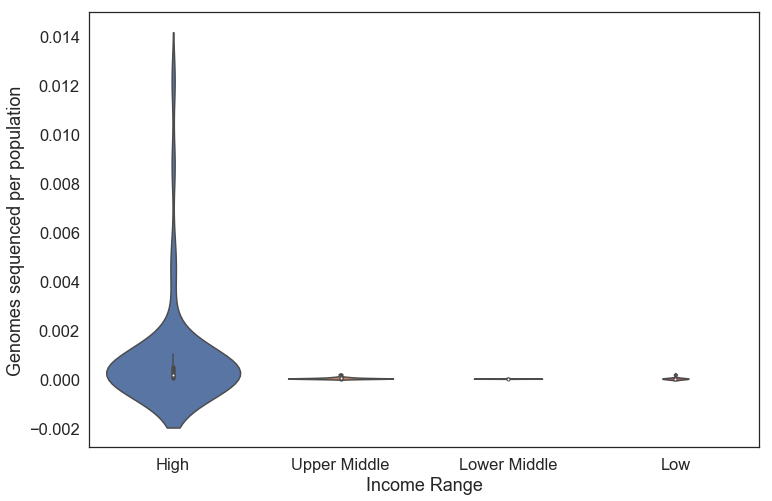

In [482]:
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = sns.violinplot(x="Income Category", y="sequenced_per_pop",  data=df_merged3,scale='count')
ax.set(xlabel='Income Range', ylabel='Genomes sequenced per population')

# figure.savefig('full_figure.png')
ax.figure.savefig('violin_income_seq.png')

In [483]:
#gdp per capita vs number of sequences per cases reported

In [484]:
#0.015; 0.01; 0.005; 0.0002, 0.0001, ...

In [485]:
# spacing, grid

In [486]:
java -jar ../../eMST/nn.jar -a 1 -e 0 -i output_0.01.csv -o emst_output_0_0.01.csv

SyntaxError: invalid syntax (<ipython-input-486-0554d391ced4>, line 1)